# Analisis exploratorio del dataset

In [1]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\0V\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/cripto_dataset_final.csv')
df.shape

(1000, 20)

In [4]:
df.head()

,id,name,symbol,categoria,price_usd,market_cap,cmc_rank,volume_24h,volume_pct,circulating_supply,total_supply,max_supply,social_score,rating,halving_flag,multichain_flag,cex_listed,contract_address,wallet_support,explorers
0,bittensor,Bittensor,tao,AI,349.020000,3.033445e+09,NaN,68486801.0,2.257724,8.700789e+06,2.100000e+07,2.100000e+07,NaN,NaN,0,0,NaN,NaN,NaN,https://taostats.io/
1,near,NEAR Protocol,near,AI,2.340000,2.826740e+09,NaN,114518894.0,4.051271,1.210004e+09,1.248424e+09,NaN,NaN,NaN,0,1,NaN,NaN,NaN,"https://nearblocks.io, https://platform.arkham..."
2,internet-computer,Internet Computer,icp,AI,4.630000,2.464128e+09,NaN,45845435.0,1.860514,5.327727e+08,5.327727e+08,NaN,NaN,NaN,0,0,NaN,ryjl3-tyaaa-aaaaa-aaaba-cai,NaN,https://dashboard.internetcomputer.org/caniste...
3,render-token,Render,render,AI,4.350000,2.251259e+09,NaN,171659713.0,7.625055,5.177166e+08,5.324768e+08,NaN,NaN,NaN,0,1,NaN,0x6de037ef9ad2725eb40118bb1702ebb27e4aeb24,NaN,https://solscan.io/token/rndrizkt3mk1iimdxrdwa...
4,fetch-ai,Artificial Superintelligence Alliance,fet,AI,0.662078,1.723873e+09,NaN,89015065.0,5.163669,2.604959e+09,2.714494e+09,2.714494e+09,NaN,NaN,0,1,NaN,0xaea46a60368a7bd060eec7df8cba43b7ef41ad85,NaN,"https://explore.fetch.ai/, https://platform.ar..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1000 non-null   object 
 1   name                1000 non-null   object 
 2   symbol              1000 non-null   object 
 3   categoria           1000 non-null   object 
 4   price_usd           1000 non-null   float64
 5   market_cap          1000 non-null   float64
 6   cmc_rank            1 non-null      float64
 7   volume_24h          1000 non-null   float64
 8   volume_pct          1000 non-null   float64
 9   circulating_supply  1000 non-null   float64
 10  total_supply        989 non-null    float64
 11  max_supply          847 non-null    float64
 12  social_score        0 non-null      float64
 13  rating              0 non-null      float64
 14  halving_flag        1000 non-null   int64  
 15  multichain_flag     1000 non-null   int64  
 16  cex_lis

In [6]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_columns.__len__())
print("Categorical columns:", categorical_columns.__len__())
numeric_columns, categorical_columns


Numeric columns: 14
Categorical columns: 6


(['price_usd',
  'market_cap',
  'cmc_rank',
  'volume_24h',
  'volume_pct',
  'circulating_supply',
  'total_supply',
  'max_supply',
  'social_score',
  'rating',
  'halving_flag',
  'multichain_flag',
  'cex_listed',
  'wallet_support'],
 ['id', 'name', 'symbol', 'categoria', 'contract_address', 'explorers'])

In [7]:
df.isnull().sum()

id                       0
name                     0
symbol                   0
categoria                0
price_usd                0
market_cap               0
cmc_rank               999
volume_24h               0
volume_pct               0
circulating_supply       0
total_supply            11
max_supply             153
social_score          1000
rating                1000
halving_flag             0
multichain_flag          0
cex_listed             999
contract_address        56
wallet_support        1000
explorers                4
dtype: int64

In [8]:
(df.isnull().mean() * 100).round(2).sort_values(ascending=False).head(10)

wallet_support      100.0
social_score        100.0
rating              100.0
cmc_rank             99.9
cex_listed           99.9
max_supply           15.3
contract_address      5.6
total_supply          1.1
explorers             0.4
symbol                0.0
dtype: float64

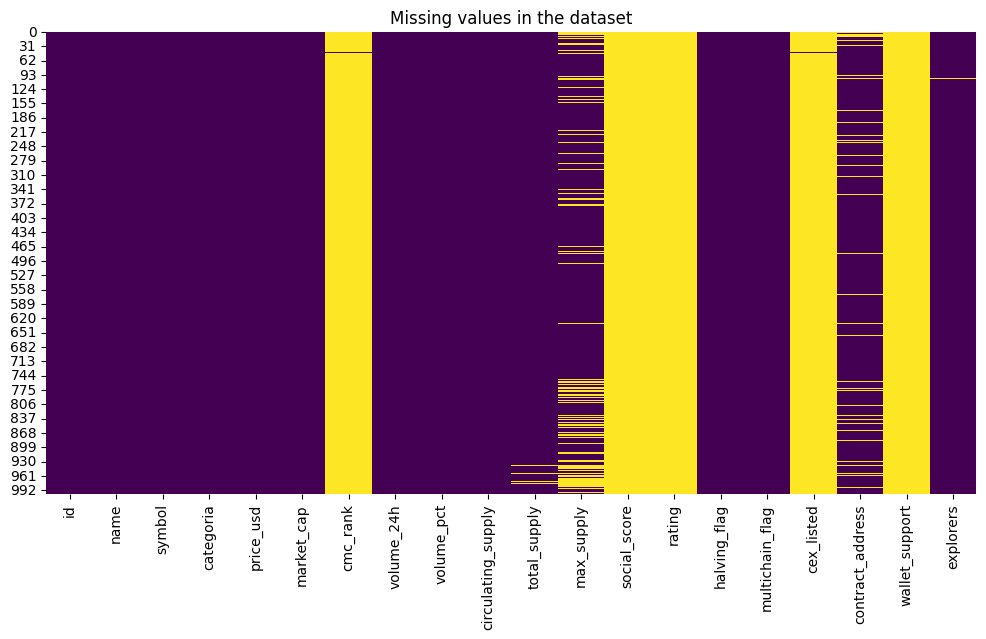

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

Observamos 3 columnas numericas con valores nulos. Aparentes patrones en `market_cap_rank` y `total_supply`

In [10]:
df.describe()

,price_usd,market_cap,cmc_rank,volume_24h,volume_pct,circulating_supply,total_supply,max_supply,social_score,rating,halving_flag,multichain_flag,cex_listed,wallet_support
count,1.000000e+03,1.000000e+03,1.0,1.000000e+03,1000.000000,1.000000e+03,9.890000e+02,8.470000e+02,0.0,0.0,1000.0,1000.000000,1.0,0.0
mean,1.716760e+04,1.279549e+08,449.0,7.825531e+06,11.001885,6.755015e+14,1.255784e+15,1.496097e+15,NaN,NaN,0.0,0.369000,1.0,NaN
std,5.413577e+05,9.620541e+08,NaN,3.581795e+07,26.147140,1.006440e+16,2.026963e+16,2.214866e+16,NaN,NaN,0.0,0.482775,NaN,NaN
min,8.348500e-11,0.000000e+00,449.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,0.0,0.000000,1.0,NaN
25%,3.661735e-03,3.282669e+06,449.0,4.160000e+04,0.564463,8.594569e+07,1.763871e+08,5.000000e+08,NaN,NaN,0.0,0.000000,1.0,NaN
50%,2.229804e-02,1.057612e+07,449.0,2.651690e+05,2.703333,6.590444e+08,9.999922e+08,1.000000e+09,NaN,NaN,0.0,0.000000,1.0,NaN
75%,1.783147e-01,3.776978e+07,449.0,2.798925e+06,10.593212,1.763549e+09,4.925702e+09,8.000004e+09,NaN,NaN,0.0,1.000000,1.0,NaN
max,1.711927e+07,2.541444e+10,449.0,6.153437e+08,356.847849,1.879982e+17,4.200000e+17,4.200000e+17,NaN,NaN,0.0,1.000000,1.0,NaN


Observamos posibles valores nulos, en `market_cap`, `total_volume`, `circulating_supply`, `total_supply` y otros 

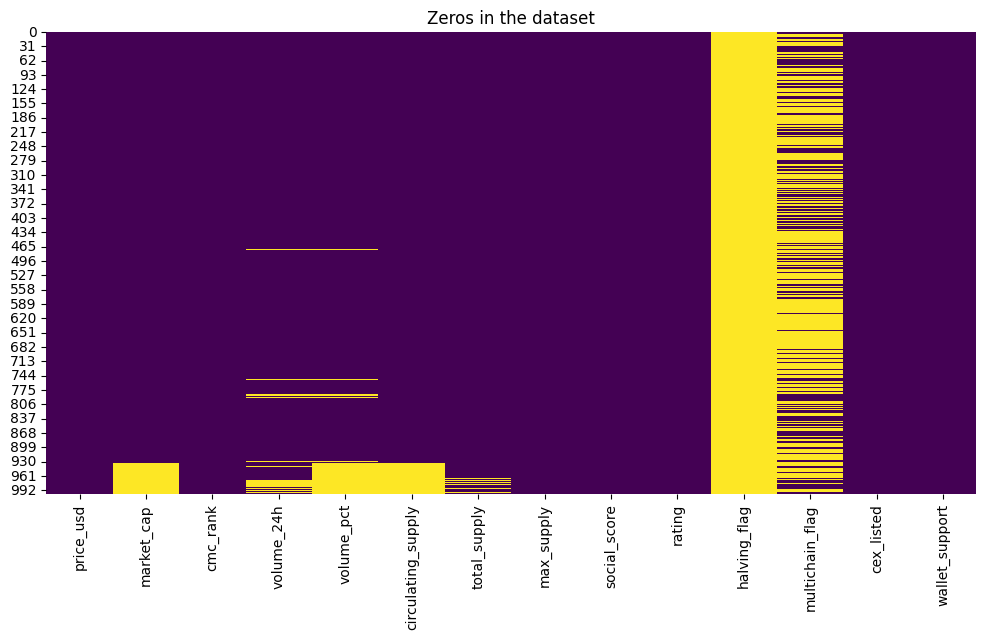

In [11]:
hipo_nulls = numeric_columns

# Crear un DataFrame booleano donde los valores son 0
# si el valor es 0 y 1 si no lo es
df_zeros = df[hipo_nulls] == 0
# Crear un mapa de calor de ceros
plt.figure(figsize=(12, 6))
sns.heatmap(df_zeros, cbar=False, cmap='viridis')
plt.title('Zeros in the dataset')
plt.show()


# Medidas
- Imputaremos null a los valores 0 en escalas de tipo razon, excepto en `ath_change_percentage` y `atl_change_percentage` 
- Eliminaremos la columna `roi`

In [12]:
# === Paso previo: eliminar 'roi' y convertir ceros a NaN ==============
# 1. eliminar 'roi' si existe
if 'roi' in df.columns:
    df.drop(columns='roi', inplace=True)
    print("Columna 'roi' eliminada")

# 2. marcar ceros como NaN en escalas de razón
#    excepto en 'ath_change_percentage' y 'atl_change_percentage'
exclude_cols = ['ath_change_percentage', 'atl_change_percentage']
numeric_reason = [c for c in df.select_dtypes(include=['int64','float64']).columns
                  if c not in exclude_cols]

for col in numeric_reason:
    # sustituimos 0 por NaN solo si hay al menos 1 valor distinto de cero
    zeros = (df[col] == 0)
    if zeros.any() and (df[col] != 0).any():
        df.loc[zeros, col] = np.nan
        print(f"Reemplazados {zeros.sum()} ceros por NaN en {col}")

print("→ Valores faltantes después de esta etapa:", df.isna().sum().sum())


Reemplazados 66 ceros por NaN en market_cap
Reemplazados 32 ceros por NaN en volume_24h
Reemplazados 77 ceros por NaN en volume_pct
Reemplazados 66 ceros por NaN en circulating_supply
Reemplazados 9 ceros por NaN en total_supply
Reemplazados 631 ceros por NaN en multichain_flag
→ Valores faltantes después de esta etapa: 6103


## Conclusiones preliminares sobre data faltante (Iteracion 2)

- Al extender el dataset de muestra, observamos una perdida de informacion de tipo parche. Se ahondara en las causas de dicho patron, antes de proceder a imputar. 

- Se elimino la columna `roi`. 

- Se imputó null a los valores 0 en escalas de tipo razon, excepto en `ath_change_percentage` y `atl_change_percentage` 

- En una seguiente iteracion se retomaran los valores 0, para atender valores pequenos que hubiesien sido redondeados a 0 por la plataforma. 


`roi` : métrica utilizada por los comerciantes de criptomonedas para medir el rendimiento y la eficacia de una inversión en criptomonedas
Posteriormente es posible se restablezca usando la formula 
```ROI = ((Valor final - Costo inicial) / Costo inicial) * 100```

## 2ª parte – Tratamiento de valores faltantes, outliers y visualizaciones

In [13]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\0V\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Imputación condicional media / mediana / moda


In [ ]:
from scipy.stats import shapiro

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

def impute_numeric(s):
    non_na = s.dropna()
    p_val = shapiro(non_na.sample(min(5000, len(non_na)), random_state=42))[1] if len(non_na) > 3 else 0
    return s.fillna(non_na.mean() if p_val > 0.05 else non_na.median())

def impute_cat(s):
    mode = s.mode(dropna=True)
    return s.fillna(mode.iloc[0] if not mode.empty else "Missing")

df[num_cols] = df[num_cols].apply(impute_numeric)
df[cat_cols] = df[cat_cols].apply(impute_cat)
print("❖ NA restantes:", df.isna().sum().sum())


❖ NA restantes: 3000


C:\Users\0V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


### Boxplots antes de la aplicación de la regla


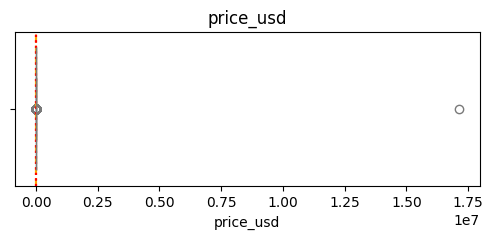

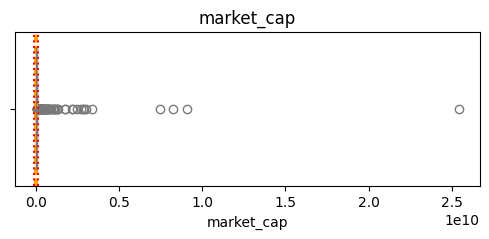

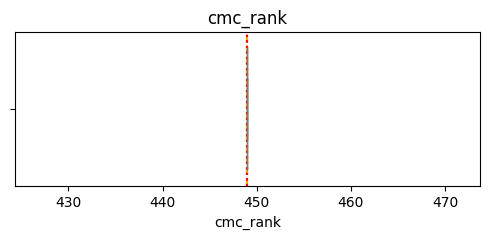

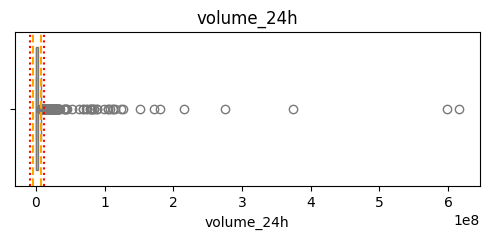

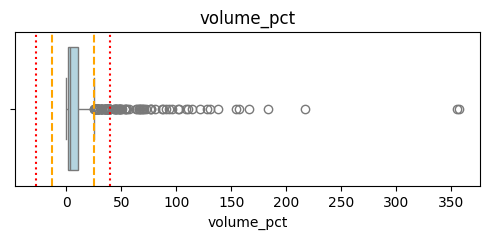

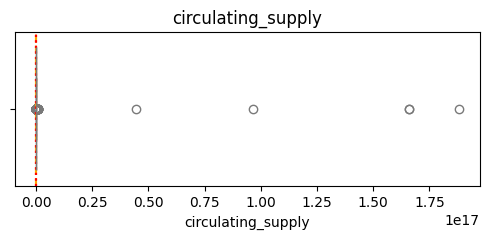

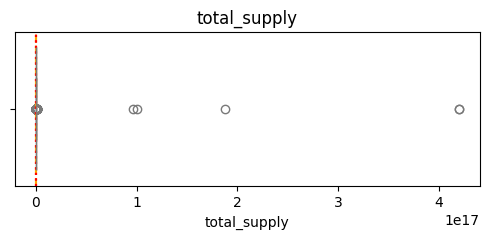

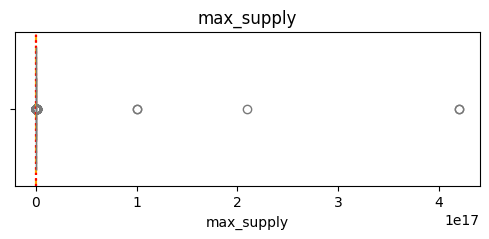

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

def boxplot_iqr(col):
    x = df[col]
    q1, q3 = x.quantile([.25, .75]); iqr = q3 - q1
    plt.figure(figsize=(6,2))
    sns.boxplot(x=x, color='lightblue')
    for k,c,ls in [(1.5,'orange','--'), (3,'red',':')]:
        plt.axvline(q1-k*iqr, color=c, ls=ls)
        plt.axvline(q3+k*iqr, color=c, ls=ls)
    plt.title(col); plt.show()

for col in num_cols[:8]:    # muestra 8 variables numéricas
    boxplot_iqr(col)


### Regla 1.5 × IQR (± 3 IQR para extremos)

In [16]:
# === Tratamiento de outliers (regla de Tukey) =========================
def treat_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    inner_low  = q1 - 1.5 * iqr
    inner_high = q3 + 1.5 * iqr
    outer_low  = q1 - 3   * iqr
    outer_high = q3 + 3   * iqr

    # contadores
    suspected = series[(series < inner_low) | (series > inner_high)].size
    extreme   = series[(series < outer_low) | (series > outer_high)].size
    print(f"{series.name:<30}  sospechosos={suspected:4}   extremos={extreme:4}")

    # reemplazo SOLO de extremos por la mediana
    median = series.median()
    series_out = series.copy()
    mask_extreme = (series < outer_low) | (series > outer_high)
    series_out[mask_extreme] = median
    return series_out

print("— Conteo de outliers por columna —")
df[num_cols] = df[num_cols].apply(treat_outliers)



— Conteo de outliers por columna —
price_usd                       sospechosos= 173   extremos= 144
market_cap                      sospechosos= 141   extremos= 104
cmc_rank                        sospechosos=   0   extremos=   0
volume_24h                      sospechosos= 163   extremos= 119
volume_pct                      sospechosos= 111   extremos=  57
circulating_supply              sospechosos= 208   extremos= 191
total_supply                    sospechosos= 155   extremos= 147
max_supply                      sospechosos= 220   extremos= 206
social_score                    sospechosos=   0   extremos=   0
rating                          sospechosos=   0   extremos=   0
halving_flag                    sospechosos=   0   extremos=   0
multichain_flag                 sospechosos=   0   extremos=   0
cex_listed                      sospechosos=   0   extremos=   0
wallet_support                  sospechosos=   0   extremos=   0


C:\Users\0V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\0V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\0V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Boxplots con regla 1.5 × IQR (± 3 IQR para extremos)


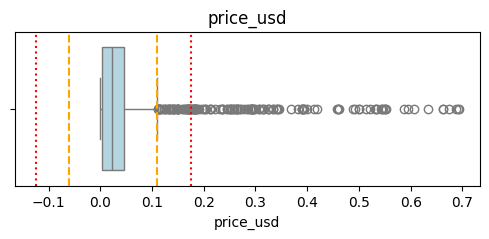

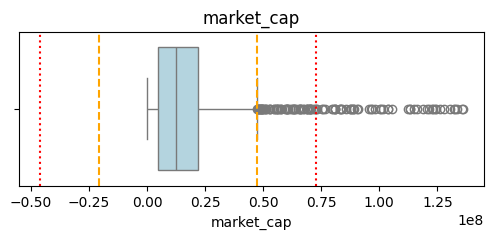

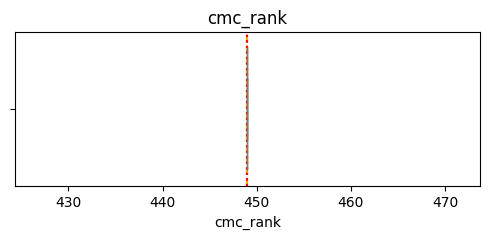

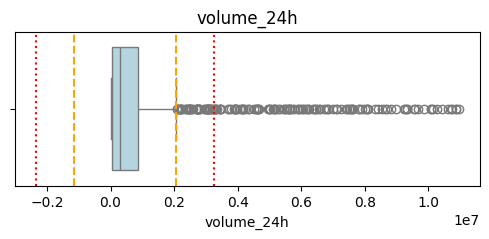

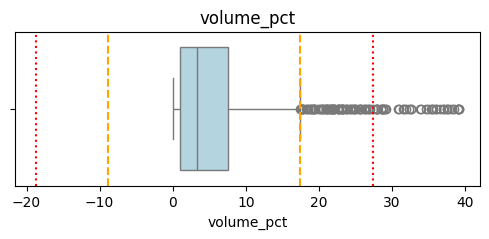

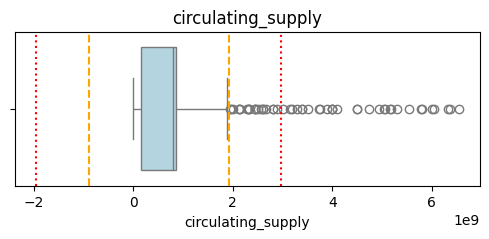

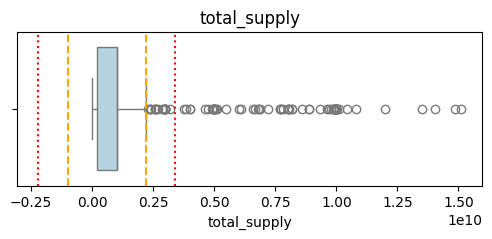

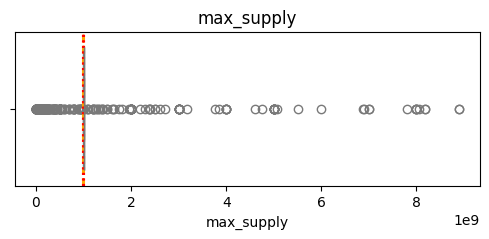

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

def boxplot_iqr(col):
    x = df[col]
    q1, q3 = x.quantile([.25, .75]); iqr = q3 - q1
    plt.figure(figsize=(6,2))
    sns.boxplot(x=x, color='lightblue')
    for k,c,ls in [(1.5,'orange','--'), (3,'red',':')]:
        plt.axvline(q1-k*iqr, color=c, ls=ls)
        plt.axvline(q3+k*iqr, color=c, ls=ls)
    plt.title(col); plt.show()

for col in num_cols[:8]:    # muestra 8 variables numéricas
    boxplot_iqr(col)

### Pairplot (diagrama de pares) de variables numéricas

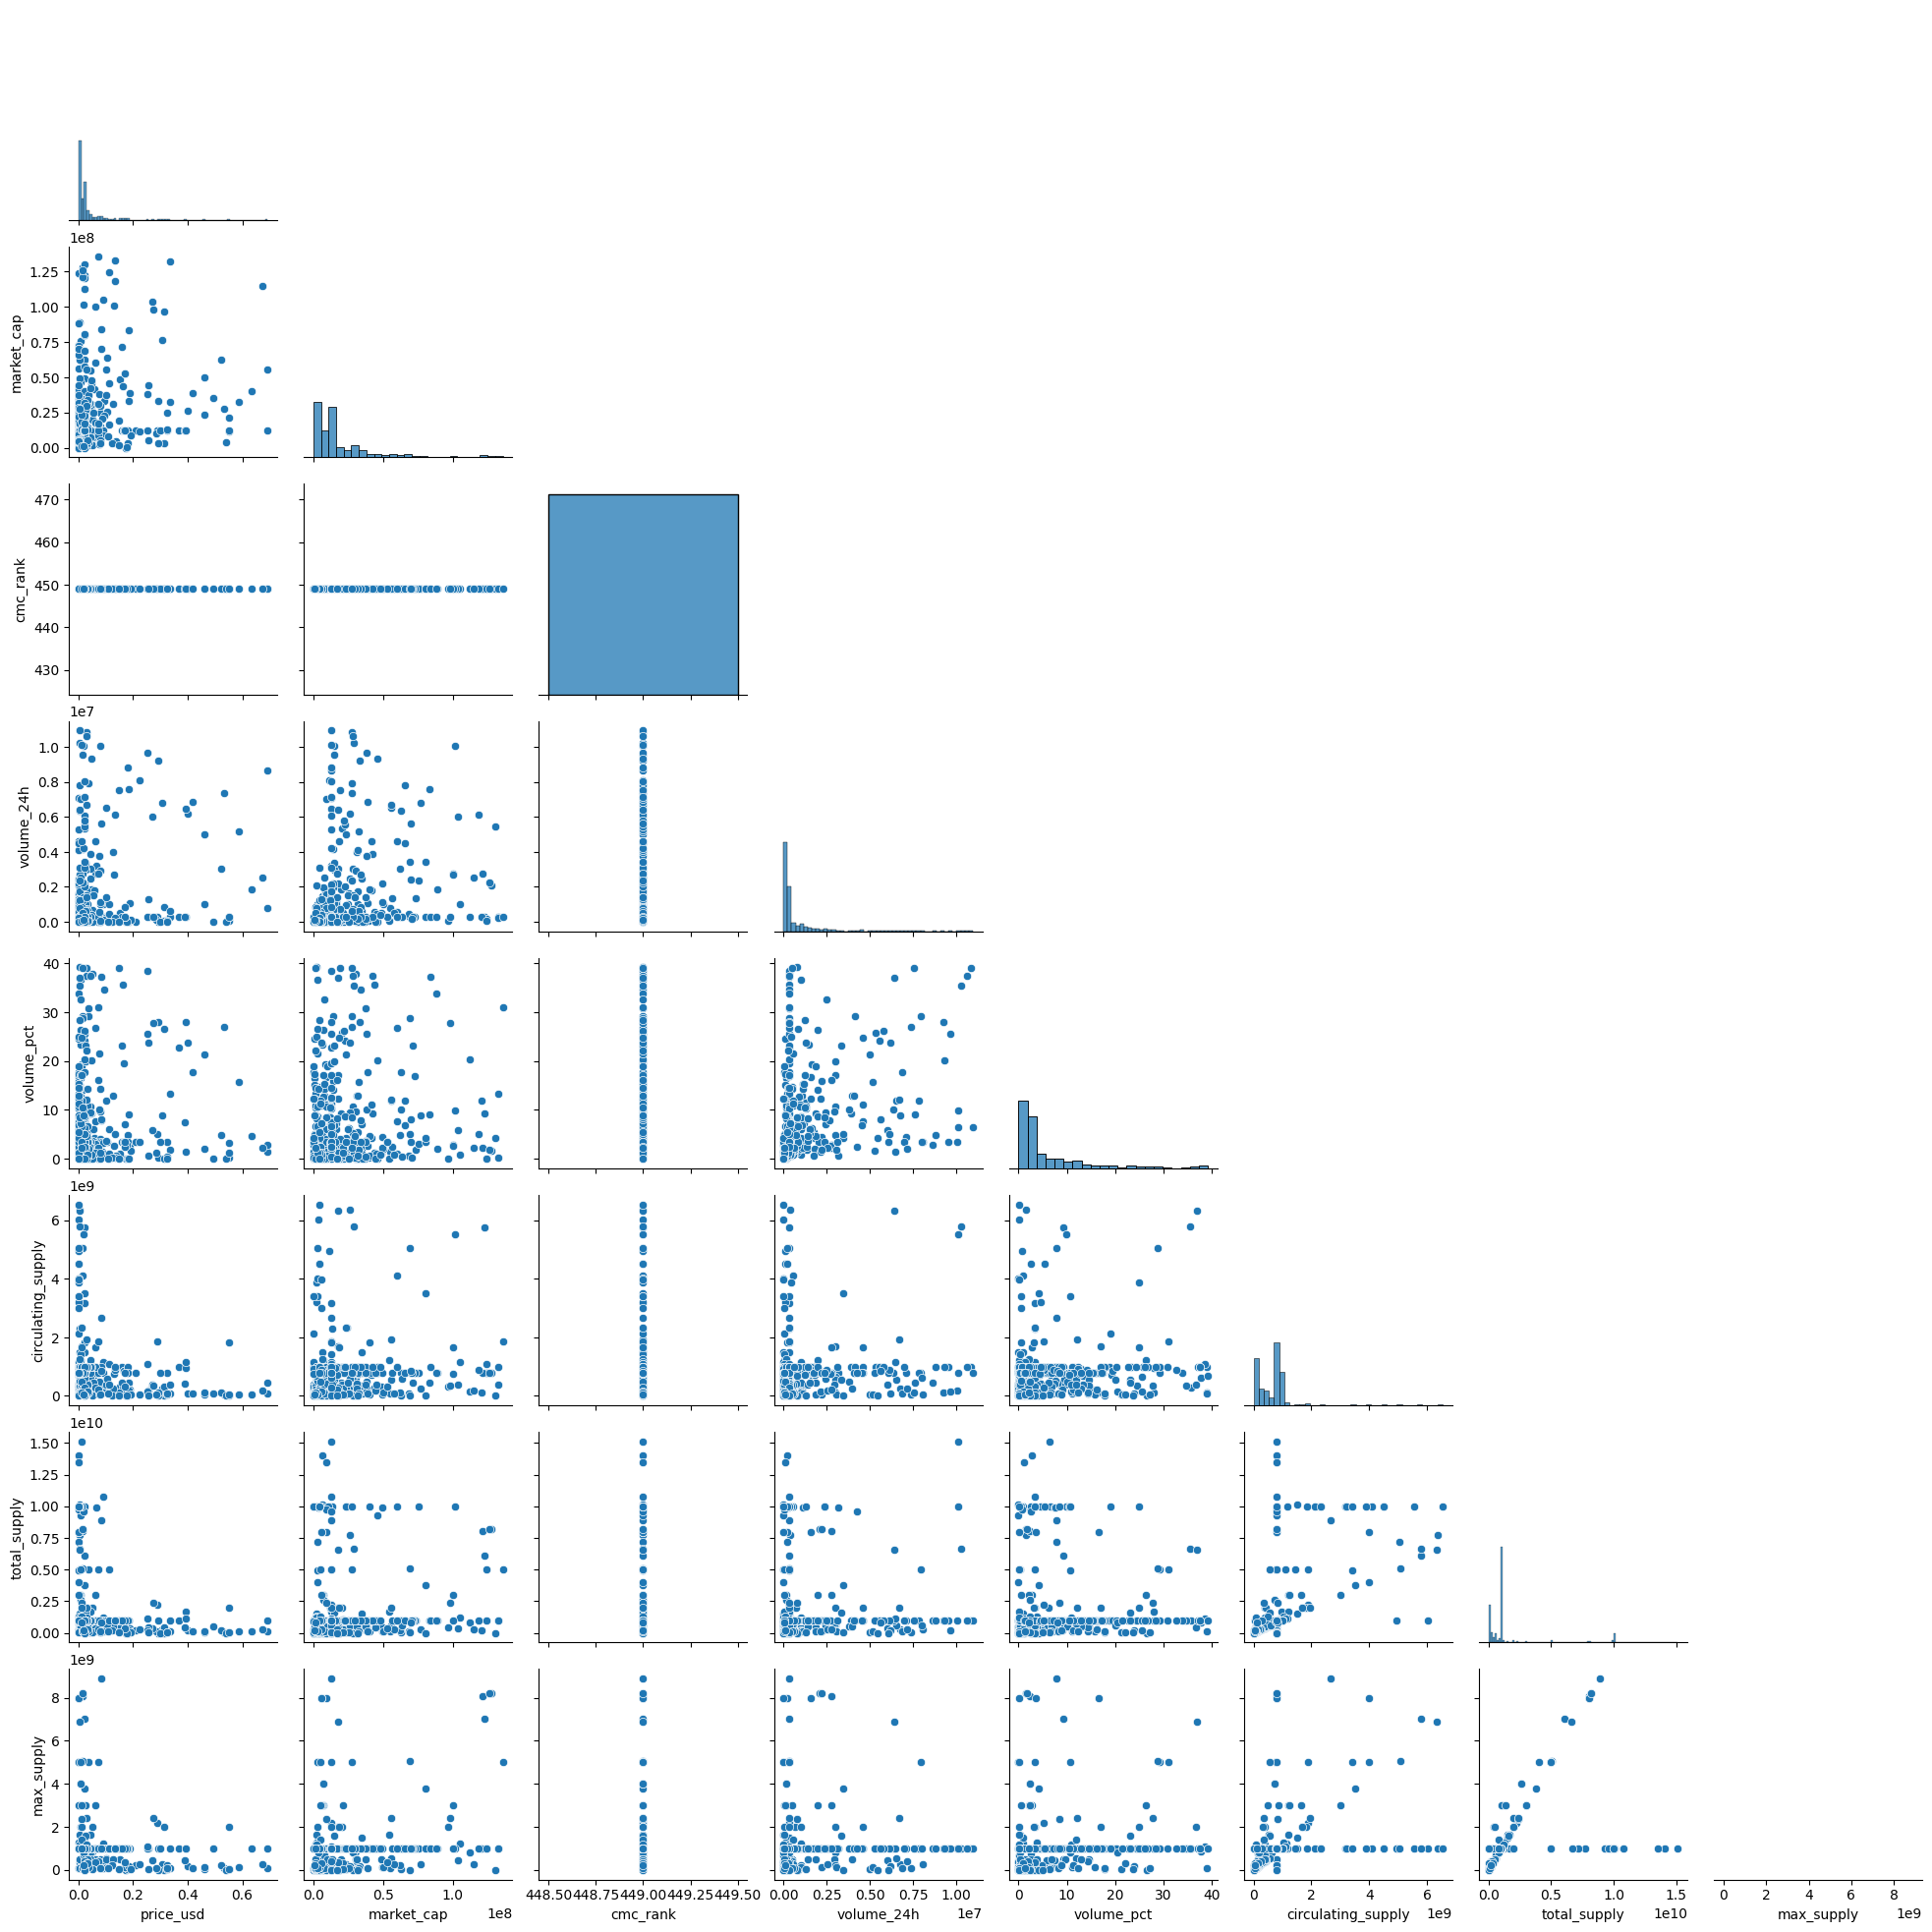

In [ ]:
subset = num_cols[:8] if len(num_cols) > 8 else num_cols
sns.pairplot(df[subset].sample(min(500, len(df)), random_state=42), corner=True)
plt.show()


### Heatmap de asociación entre variables categóricas (Cramér’s V)

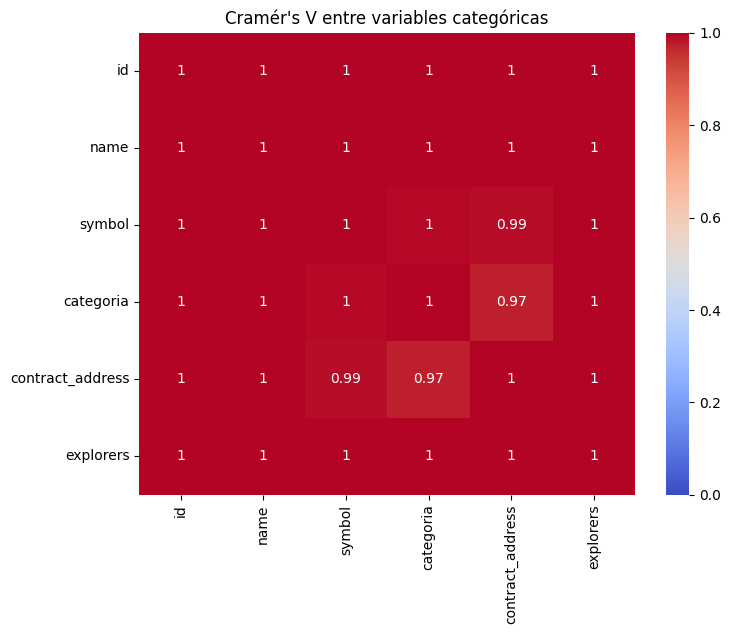

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np, pandas as pd

def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    chi2 = chi2_contingency(tab, correction=False)[0]
    n   = tab.values.sum()
    r,k = tab.shape
    return np.sqrt(chi2/(n*(min(k,r)-1)))

cat_subset = cat_cols[:8]           # primeras 8 categóricas
mat = pd.DataFrame(index=cat_subset, columns=cat_subset, dtype=float)
for i in cat_subset:
    for j in cat_subset:
        mat.loc[i,j] = cramers_v(df[i], df[j])

plt.figure(figsize=(8,6))
sns.heatmap(mat, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V entre variables categóricas")
plt.show()


### Guardar CSV limpio en la carpeta `data/`

In [22]:
# === Guardar CSV limpio en /data ======================================
from pathlib import Path

# ruta →  <directorio‑actual>/data/criptos_limpio.csv
OUT_PATH = Path.cwd() / "data" / "criptos_limpio.csv"

# crea la carpeta si aún no existe
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(OUT_PATH, index=False)
print(f"✔ Dataset limpio guardado en {OUT_PATH.relative_to(Path.cwd())}")


✔ Dataset limpio guardado en data\criptos_limpio.csv


## 3ª parte – Grafo

## Grafo bipartito de 900 Proyectos ↔ 4 Categorías

### Construcción y serialización del grafo


In [ ]:
# ================================================================
#  Grafo bipartito 900 proyectos  ↔  4 categorías
# ================================================================
import networkx as nx, pandas as pd, pickle, matplotlib.pyplot as plt
from pathlib import Path

CSV_GRAFO = "criptos_por_categoria.csv"     # cambia si está en otra ruta
OUT_GPK   = "data/crypto_bipartite_900.gpickle"   # carpeta /data

COLOR_BY_CAT = {
    "AI":     "#4DA5F7",
    "Gaming": "#63D471",
    "RWA":    "#F6D860",
    "Memes":  "#FF8A80",
}

def sample_225(df):
    parts=[]
    for cat,g in df.groupby("categoria"):
        parts.append(g.sample(min(225,len(g)), random_state=42))
    return pd.concat(parts, ignore_index=True)

def build_graph(df):
    G = nx.Graph()
    max_cap = df["market_cap"].max()

    # nodos categoría
    for cat in COLOR_BY_CAT:
        G.add_node(cat, ntype="category", color="#C62828")

    # nodos proyecto
    for _, r in df.iterrows():
        G.add_node(
            r["id"], ntype="project", category=r["categoria"],
            market_cap=r["market_cap"], color=COLOR_BY_CAT[r["categoria"]]
        )
        G.add_edge(r["id"], r["categoria"])
    return G

# -------- pipeline ----------
raw = pd.read_csv(CSV_GRAFO)
sample = sample_225(raw)              # 900 proyectos
G = build_graph(sample)

# guardar .gpickle en /data
Path("data").mkdir(exist_ok=True)
try:
    nx.write_gpickle(G, OUT_GPK)
except AttributeError:                # compatibilidad NetworkX 3.x
    with open(OUT_GPK, "wb") as f: pickle.dump(G, f)

print(f"Grafo guardado en {OUT_GPK}  —  nodos={G.number_of_nodes()}  aristas={G.number_of_edges()}")


### Visualización completa 

In [ ]:
# ================================================================
#  Visualización: 904 nodos con etiquetas y tamaños ∝ market_cap
# ================================================================
pos = nx.spring_layout(G, seed=42, k=0.25)

sizes = [ (G.nodes[n]["market_cap"] / sample["market_cap"].max() * 700 + 40)
          if G.nodes[n]["ntype"]=="project" else 1000 for n in G.nodes ]
colors = [ G.nodes[n]["color"] for n in G.nodes ]

plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=0.4, alpha=0.4)

# etiquetas
proj_labels = {n:n for n,d in G.nodes(data=True) if d["ntype"]=="project"}
cat_labels  = {n:n for n,d in G.nodes(data=True) if d["ntype"]=="category"}
nx.draw_networkx_labels(G, pos, labels=proj_labels, font_size=4)
nx.draw_networkx_labels(G, pos, labels=cat_labels, font_size=12, font_weight="bold")

import matplotlib.patches as mpatches
legend = [mpatches.Patch(color=c, label=cat) for cat,c in COLOR_BY_CAT.items()]
plt.legend(handles=legend, title="Categorías", loc="lower left")
plt.title("Grafo bipartito 900 Proyectos ↔ 4 Categorías\n(tamaño ∝ capitalización)")
plt.axis("off")
plt.tight_layout()
plt.savefig("data/crypto_bipartite_900.png", dpi=300)
plt.show()


### Interpretación del grafo bipartito


In [ ]:
print(
    "* Cada nodo rojo es una categoría y conecta con 225 proyectos.\n"
    "* El tamaño de los nodos‑proyecto refleja su market_cap: "
    "los tokens ancla son los más grandes.\n"
    "* Los colores permiten ver la densidad y equilibrio entre verticales."
)
